### NCL

#### 转换grb数据为nc


```sheel
ncl_convert2nc U12345.grb

```

# 雷达数据的处理
### 雷达数据处理成笛卡尔系的格点数据

In [3]:
import cinrad
import math
import numpy as np
%matplotlib inline
#处理雷达数据
file = '/home/liyuan3970/study_demo/met_plot/利齐马/src/'
f = cinrad.io.CinradReader(file+'Z_RADR_I_Z9577_20190809180500_O_DOR_SA_CAP.bin.bz2')
step = 0.01
tilt_number = 0
data_radius = 230
data_dtype = 'REF' # stands for reflectivity
ra = f.get_data(tilt_number, data_radius, data_dtype)

v = []
v.append(ra)
gmap =cinrad.easycalc.GridMapper(v)
grid = gmap(step)
lon = grid.lon

lat = grid.lat
#print(lat[0][:])
data = grid.data
print(lat.shape)
#print(data.shape)

start_lat = np.amin(lat)
end_lat = np.amax(lat)
start_lon = np.amin(lon)
end_lon = np.amax(lon)



nlats = len(lat); 
#print(nlats)
nlons = len(lon[0][:]); 
#print(nlons)


(416, 471)


### 输出为Netcdf

In [4]:
import netCDF4     # Note: python is case-sensitive!
import numpy as np

try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass
ncfile = netCDF4.Dataset('Radar.nc',mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)


lat_dim = ncfile.createDimension('lat', nlats)     # latitude axis
lon_dim = ncfile.createDimension('lon', nlons)    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).

ncfile.title='Z_RADR_I_Z9577_20190809180500_O_DOR_SA_CAP'

# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
# Define a 3D variable to hold the data
ref= ncfile.createVariable('ref',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
ref.units = 'DBZ' # degrees Kelvin
ref.standard_name = 'radar_DBZ' # this is a CF standard name



# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
lat[:] = np.arange(start_lat,end_lat,step) # south pole to north pole
lon[:] = np.arange(start_lon,end_lon,step) # Greenwich meridian eastward
print(lon)
# create a 3D array of random numbers

# Write the data.  This writes the whole 3D netCDF variable all at once.
ref[0,:,:] = data  # Appends data along unlimited dimension
ncfile.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (471,)
filling on, default _FillValue of 9.969209968386869e+36 used


![台风](rader/src/radar_io.png)

NameError: name 'NRadar' is not defined

## 数据插值

In [12]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy.interpolate import interp1d
xi = np.linspace(0, 1, 11, endpoint=True)
vi = np.linspace(0, 1, 5, endpoint=True)

def fv(x):
    return x
interp_nn = interp1d(vi, fv(vi), kind='nearest')    
print(interp_nn)

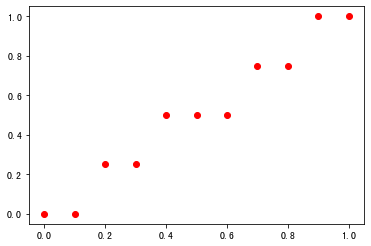

In [16]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy.interpolate import interp1d
xi = np.linspace(0, 1, 11, endpoint=True)
vi = np.linspace(0, 1, 5, endpoint=True)

def fv(x):
    return x
interp_nn = interp1d(vi, fv(vi), kind='nearest')    

xy = fv(xi)
vy = fv(vi)

#plt.plot(vi, fv(vi), 'b+', markersize=18)

plt.plot(xi, interp_nn(xi), 'ro')
plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, 1.05)
plt.show()

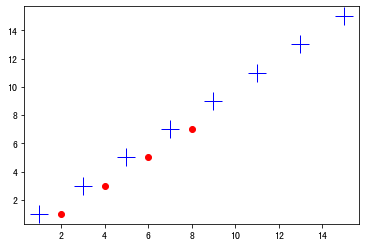

In [29]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import math

x = [1,3,5,7,9,11,13,15]
y = [1,3,5,7,9,11,13,15]
# for i in x:
#     y.append(math.sin(i))
# print(y)
xi = [2,4,6,8]
def fv(x):
    return x
interp_nn = interp1d(x, y, kind='nearest')   
plt.plot(xi, interp_nn(xi), 'ro')
plt.plot(x, y, 'b+', markersize=18)

[0.   0.25 0.5  0.75 1.  ]
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.

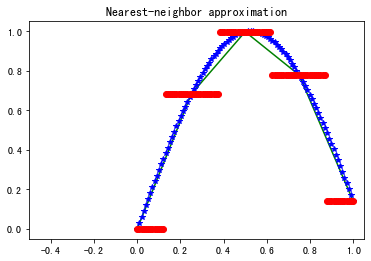

In [33]:
import numpy as np, matplotlib.pyplot as plt
from scipy.interpolate import interp1d
v = np.linspace(0, 1, 5)
print(v) 
def f(x):
    return np.sin(3 * x)
xi = np.linspace(0, 1, 100)
print( xi, "#xi")
interp_nn = interp1d(v, f(v), kind='nearest')
print( interp_nn(xi))
plt.plot(v, f(v), 'g')
plt.plot(xi, f(xi), 'b*')
plt.plot(xi, interp_nn(xi), 'ro')
plt.title("Nearest-neighbor approximation")
plt.ylim(-0.05, 1.05)
plt.xlim(-0.5, 1.05)
plt.show()

(41, 41)
[-0.76303082]


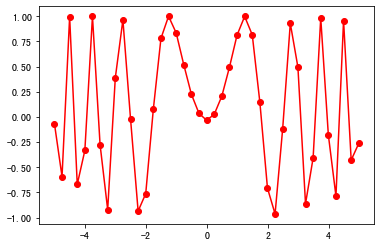

In [45]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
print(z.shape)
f = interpolate.interp2d(x, y, z, kind='cubic')

import matplotlib.pyplot as plt
xnew = 2#np.arange(-5.01, 5.01, 1e-2)
ynew = 0.1#np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
print(znew)
plt.plot(x, z[0, :], 'ro-', xnew, znew, 'b-')
plt.show()